#Implementar el algoritmo K-Means. Para evaluar el funcionamiento del mismo, usar el dataset sintetico ultilizado previamente con la implementación de K-Means de sklearn.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 8
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

##Implementacion K-means

In [2]:
def k_means(X, k, tol=1e-20, n_iter=100):
    # simple random initialization
    n_samples, n_dim = X.shape
    #centroids = (X.max() - X.min()) * np.random.random((k, n_dim)) + X.min()
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]
    
    distortion, prev_distortion = 0., 1e6
    for q in range(n_iter):     
        # 1) Asignación de muestras a centroides:
        # computar una lista (o array) en donde el elemento i-ésimo 
        # corresponda al índice al cluster al cual debe ser asignada 
        # la muestra i-ésima de X. Utilizar la función cdist(XA, XB) 
        # para computar distancias entre dos arreglos XA y XB en donde 
        # muestras están ordenadas por filas.
        #
        Dist = cdist(centroids,X).T
        
        # 2) Actualización de centroides:
        # en base a la lista de asignaciones computada en el paso anterior, 
        # calcular el nuevo valor de cada uno de los centroides. 
        rnk = np.zeros(Dist.shape)
        for i in range(Dist.shape[0]):
          rnk[i,np.argmin(Dist,axis=1)[i]]=1
        prom=np.zeros(X.shape)
        
        for j in range(k):
          iter=0
          prom=np.zeros(X.shape[1])
          for i in range(len(X)):
            if rnk[i,j]==1:
              iter+=1
              prom+=X[i,:]
          centroids[j]=prom/iter 

        # 3) Error de cuantización
        # Computar el error de quantización promedio (error de reemplazar 
        #cada muestra por su versión cuantizada). El no decrecimiento de 
        # éste valor será uno de los parámetros que definirán el criterio 
        # de parada del algoritmo.
        distortion = 0
        for j in range(k):
          puntos = 0
          iter = 0
          for i in range(len(X)):
            if rnk[i,j]==1:
              puntos+=Dist[i,j]
              iter+=1
        distortion=(puntos**2)/iter
        if (abs(prev_distortion - distortion) / (prev_distortion + 1e-23  )) < tol:
            print('done')
            break
        print('iter={}, avg. error={:.3f}'.format(q+1, distortion)) 
        prev_distortion = distortion
            
    return centroids, distortion


##Implementacion predictor de K-means

In [3]:
def k_means_predict(centroids, points,k):
    n_samples, n_dim = points.shape
    # Implementar metodo para estimar la pertenencia de un determinado punto X[i] 
    # a uno de los centroides (clusters) definidos previamente. Utilizar la función cdist(XA, XB) 
    # para computar distancias entre dos arreglos XA y XB en donde 
    # muestras están ordenadas por filas.

    #Dist = cdist(centroids,points).T
    
    Dist = np.zeros([len(points),k])
    
    for i in range(len(points)):
      for n in range(k):
        Dist[i,n] = euclidean(centroids[n],points[i]) 
    
    rnk = np.zeros(Dist.shape)

    for i in range(Dist.shape[0]):
      rnk[i,np.argmin(Dist,axis=1)[i]]=1 
    prediction = np.zeros(points.shape[0])

    for i in range(Dist.shape[0]):
      for j in range(Dist.shape[1]):
        if rnk[i,j]==1:
          prediction[i]=j

    return prediction

##Generacion de datos

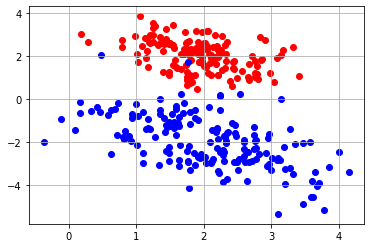

In [4]:
import numpy as np
X, Y = make_classification(n_samples=400, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_pos, x_neg = X_train[y_train > 0], X_train[y_train <= 0]    
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')    
plt.grid()

## datos llevandos a una media igual a cero y desviación estandar unitaria

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)
X_train_scaled = scaler.transform(X_train) 

StandardScaler()


##Entrenamiento 

In [6]:
k=2 #centroides
centroids , desviacion= k_means(X_train_scaled,k)
y_predict = k_means_predict(centroids,scaler.transform(X_test),k)
y_predict_invertido = abs(y_predict-1)

iter=1, avg. error=180.892
iter=2, avg. error=198.378
iter=3, avg. error=182.339
iter=4, avg. error=157.575
iter=5, avg. error=135.359
iter=6, avg. error=123.681
iter=7, avg. error=117.499
iter=8, avg. error=103.797
iter=9, avg. error=87.551
iter=10, avg. error=77.025
iter=11, avg. error=73.122
iter=12, avg. error=72.055
iter=13, avg. error=72.206
done


##Resultados

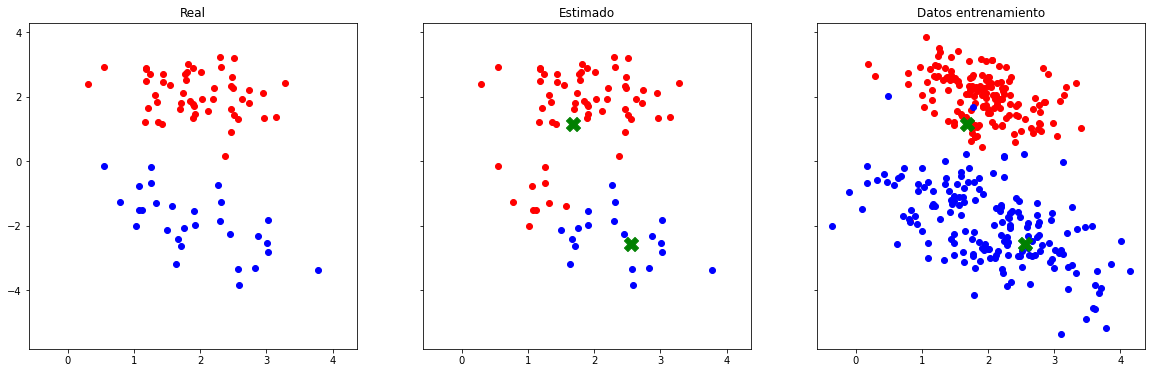

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

x_pos, x_neg = X_test[y_test > 0], X_test[y_test <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.set_title("Real")

centers_unscaled = scaler.inverse_transform(centroids)

x_pos, x_neg = X_test[y_predict > 0], X_test[y_predict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='b')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='r')  
ax2.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], marker='X', color='g', s=200) 
ax2.set_title("Estimado")

x_pos, x_neg = X_train[y_train > 0], X_train[y_train <= 0]    
ax3.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax3.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax3.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], marker='X', color='g', s=200)
ax3.set_title("Datos entrenamiento")

plt.show()

In [8]:
from sklearn.metrics import accuracy_score

# Accuracy de KMeans}
accuracy_kmeans = accuracy_score(y_test,y_predict)
accuracy_kmeans_invertido = accuracy_score(y_test,y_predict_invertido)
if accuracy_kmeans>accuracy_kmeans_invertido:
  print('Accuracy KMeans: {}'.format(accuracy_kmeans))
else:
  print('Accuracy KMeans: {}'.format(accuracy_kmeans_invertido))

Accuracy KMeans: 0.875


#2) Probar el algoritmo implementado con el dataset Iris utilizado previamente

In [9]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

##Importacion dataset y separacion de los datos de entrenamiento con los datos de test

In [10]:
iris = load_iris()
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##Transformacion de los datos de entrenamiento (media 0 y desviacion estanda 1)

In [11]:
# Transformo los datos de entrenamiento (Media=0 y Desviación_Estandar=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

##Ejecucion de K-means

In [12]:
#Seleccionamos la cantidad de means
k=3
#Corremos nuestro K-means
clasificador,desviacion = k_means(X_train_scaled,k)

prediction = k_means_predict(clasificador,scaler.transform(X_test),k)

iter=1, avg. error=261.669
iter=2, avg. error=109.586
iter=3, avg. error=109.489
done


##Resultados

In [13]:
#Accuracy de KMeans
accuracy_kmeans = accuracy_score(y_test, prediction)
print('Accuracy KMeans Casero: {}'.format(accuracy_kmeans))

Accuracy KMeans Casero: 0.4666666666666667


###Datos Test

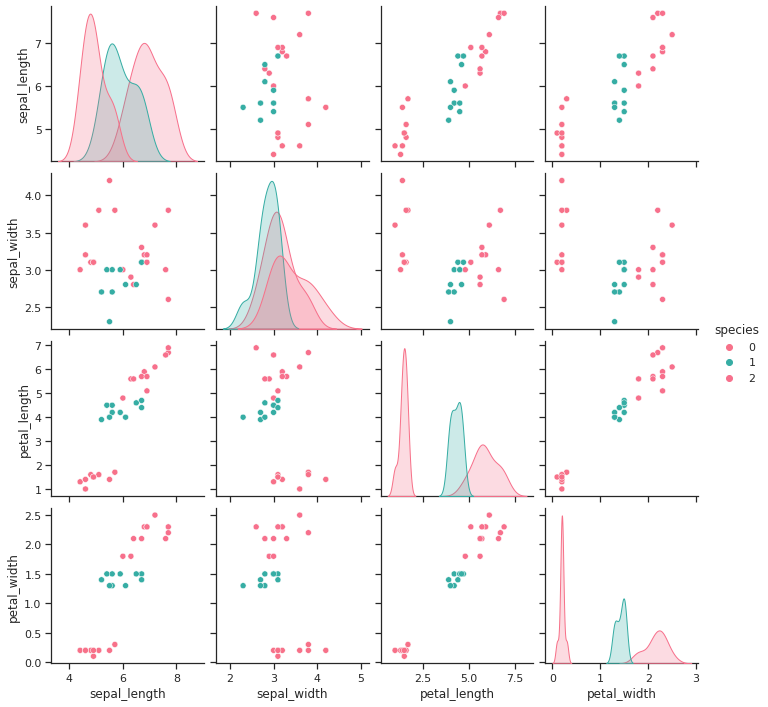

In [14]:
sns.set(style="ticks")
df_real = pd.DataFrame({'sepal_length': X_test[:,0],'sepal_width': X_test[:,1],'petal_length': X_test[:,2],'petal_width': X_test[:,3],'species':y_test}) #real
sns.pairplot(df_real,hue="species", palette="husl")

###Datos Prediccion

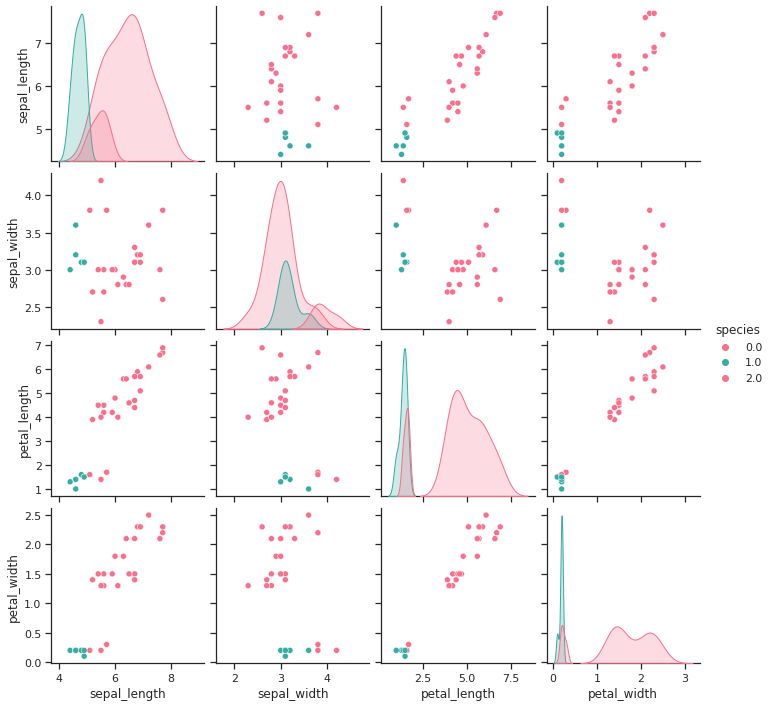

In [15]:
df_estimado = pd.DataFrame({'sepal_length': X_test[:,0],'sepal_width': X_test[:,1],'petal_length': X_test[:,2],'petal_width': X_test[:,3],'species':prediction}) #estimado
sns.pairplot(df_estimado,hue="species", palette="husl")

###Grafico Error

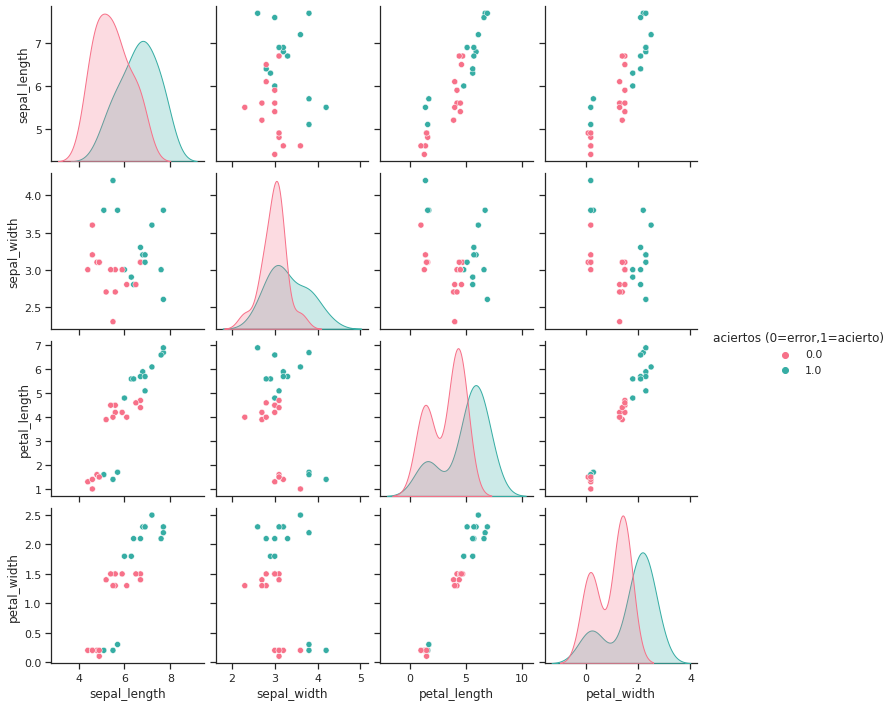

In [16]:
error=np.zeros(len(prediction))
for i in range(len(prediction)):
  if prediction[i]==y_test[i]:
    error[i]=1
df_errores = pd.DataFrame({'sepal_length': X_test[:,0],'sepal_width': X_test[:,1],'petal_length': X_test[:,2],'petal_width': X_test[:,3],'aciertos (0=error,1=acierto)':error}) #errores
sns.pairplot(df_errores,hue="aciertos (0=error,1=acierto)", palette="husl")

###Datos entrenamiento

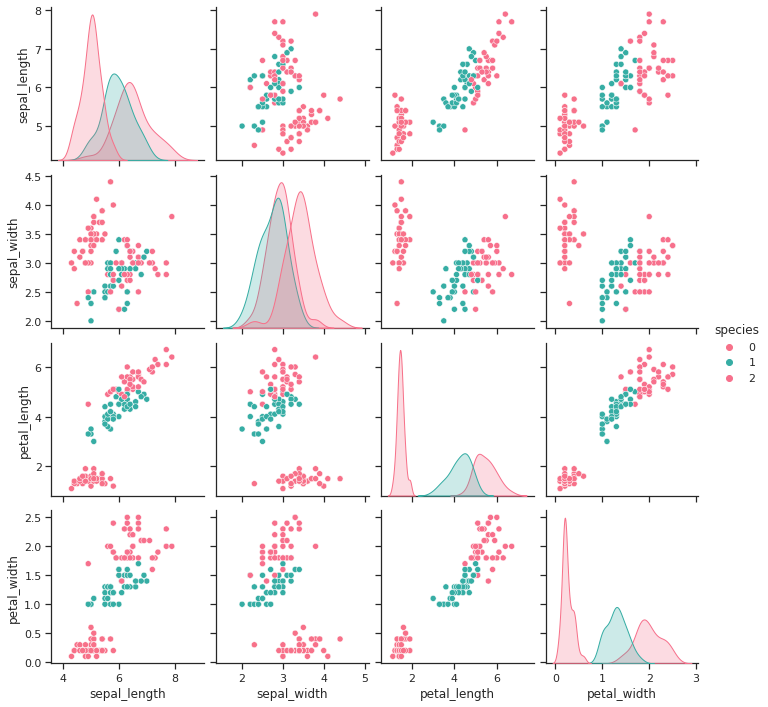

In [17]:
df_entrenamiento = pd.DataFrame({'sepal_length': X_train[:,0],'sepal_width': X_train[:,1],'petal_length': X_train[:,2],'petal_width': X_train[:,3],'species':y_train}) #datos_entrenamiento
sns.pairplot(df_entrenamiento,hue="species", palette="husl")